In [47]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [7]:
df = pd.read_csv('car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [8]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [9]:
df = df.fillna(0)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

In [81]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [82]:
y_train = df_train['fuel_efficiency_mpg']
y_val = df_val['fuel_efficiency_mpg']
y_test = df_test['fuel_efficiency_mpg']

In [83]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [84]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [85]:
train_dicts = df_train.to_dict(orient='records')

In [86]:
dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(train_dicts)

## Question 1

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [42]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.5, 0.75, 'vehicle_weight <= 2919.526\ngini = 0.888\nsamples = 5822\nvalue = [1.0, 9.0, 23.0, 61.0, 129.0, 255.0, 462.0, 658.0\n872.0, 912.0, 840.0, 686.0, 434.0, 269.0, 122.0, 52.0\n23.0, 11.0, 2.0, 1.0]'),
 Text(0.25, 0.25, 'gini = 0.8\nsamples = 2556\nvalue = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 239.0\n708.0, 684.0, 434.0, 269.0, 122.0, 52.0, 23.0, 11.0\n2.0, 1.0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.818\nsamples = 3266\nvalue = [1.0, 9.0, 23.0, 61.0, 129.0, 255.0, 462.0, 658.0\n861.0, 673.0, 132.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0\n0.0, 0.0, 0.0]'),
 Text(0.625, 0.5, '  False')]

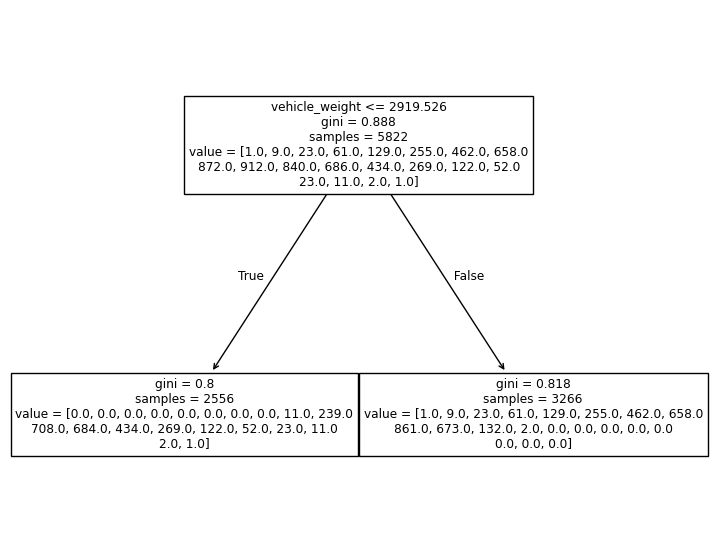

In [52]:
plt.figure(figsize=(9, 7))
plot_tree(dt, feature_names=dv.get_feature_names_out())

## Question 2

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error as rmse

In [67]:
rf = RandomForestRegressor(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [79]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [71]:
y_pred = rf.predict(X_val)
rmse(y_val, y_pred)

0.4595777223092726

## Question 3

In [72]:
for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    score = rmse(y_val, y_pred)

    print(f'Estimator: {n} Score: {score:.3f}')

Estimator: 10 Score: 0.460
Estimator: 20 Score: 0.454
Estimator: 30 Score: 0.452
Estimator: 40 Score: 0.449
Estimator: 50 Score: 0.447
Estimator: 60 Score: 0.445
Estimator: 70 Score: 0.445
Estimator: 80 Score: 0.445
Estimator: 90 Score: 0.445
Estimator: 100 Score: 0.445
Estimator: 110 Score: 0.444
Estimator: 120 Score: 0.444
Estimator: 130 Score: 0.444
Estimator: 140 Score: 0.443
Estimator: 150 Score: 0.443
Estimator: 160 Score: 0.443
Estimator: 170 Score: 0.443
Estimator: 180 Score: 0.442
Estimator: 190 Score: 0.442
Estimator: 200 Score: 0.442


## Question 4

In [96]:
for m in [10, 15, 20, 25]:
    print(f'Max Depth: {m}')
    scores = []
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n, max_depth=m, random_state=1)
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict(X_val)
        score = rmse(y_val, y_pred)
        scores.append(score)
        
    print(f'Score: {np.mean(scores)}')
    print()

Max Depth: 10
Score: 0.44180786093233565

Max Depth: 15
Score: 0.44541664456381075

Max Depth: 20
Score: 0.44625292424422536

Max Depth: 25
Score: 0.44590993626161624



## Question 5

In [114]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1)
rf.fit(X_train, y_train)
feature_imp = pd.Series(rf.feature_importances_, index=list(dv.get_feature_names_out()))
print(feature_imp.sort_values(ascending=False))

vehicle_weight                  0.959150
horsepower                      0.015998
acceleration                    0.011480
engine_displacement             0.003273
model_year                      0.003212
num_cylinders                   0.002343
num_doors                       0.001635
origin=USA                      0.000540
origin=Europe                   0.000519
origin=Asia                     0.000462
fuel_type=Gasoline              0.000360
drivetrain=All-wheel drive      0.000357
drivetrain=Front-wheel drive    0.000345
fuel_type=Diesel                0.000325
dtype: float64


## Question 6

In [97]:
import xgboost as xgb

In [102]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [103]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [104]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [110]:
model = xgb.train(xgb_params, dtrain, evals=watchlist, num_boost_round=100)

[0]	train-rmse:1.81393	val-rmse:1.85444
[1]	train-rmse:1.31919	val-rmse:1.35353
[2]	train-rmse:0.98120	val-rmse:1.01316
[3]	train-rmse:0.75443	val-rmse:0.78667
[4]	train-rmse:0.60680	val-rmse:0.64318
[5]	train-rmse:0.51381	val-rmse:0.55664
[6]	train-rmse:0.45470	val-rmse:0.50321
[7]	train-rmse:0.41881	val-rmse:0.47254
[8]	train-rmse:0.39534	val-rmse:0.45509
[9]	train-rmse:0.38038	val-rmse:0.44564
[10]	train-rmse:0.37115	val-rmse:0.43896
[11]	train-rmse:0.36361	val-rmse:0.43594
[12]	train-rmse:0.35850	val-rmse:0.43558
[13]	train-rmse:0.35365	val-rmse:0.43394
[14]	train-rmse:0.35025	val-rmse:0.43349
[15]	train-rmse:0.34666	val-rmse:0.43362
[16]	train-rmse:0.34459	val-rmse:0.43378
[17]	train-rmse:0.34128	val-rmse:0.43405
[18]	train-rmse:0.33822	val-rmse:0.43391
[19]	train-rmse:0.33709	val-rmse:0.43374
[20]	train-rmse:0.33553	val-rmse:0.43376
[21]	train-rmse:0.33243	val-rmse:0.43453
[22]	train-rmse:0.33031	val-rmse:0.43510
[23]	train-rmse:0.32815	val-rmse:0.43601
[24]	train-rmse:0.32670	va

In [111]:
y_pred = model.predict(dval)
rmse(y_val, y_pred)

0.45017755678087246

In [106]:
xgb_params_1 = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [107]:
model = xgb.train(xgb_params_1, dtrain, evals=watchlist, num_boost_round=100)

[0]	train-rmse:2.28944	val-rmse:2.34561
[1]	train-rmse:2.07396	val-rmse:2.12434
[2]	train-rmse:1.88066	val-rmse:1.92597
[3]	train-rmse:1.70730	val-rmse:1.74987
[4]	train-rmse:1.55163	val-rmse:1.59059
[5]	train-rmse:1.41247	val-rmse:1.44988
[6]	train-rmse:1.28796	val-rmse:1.32329
[7]	train-rmse:1.17660	val-rmse:1.20930
[8]	train-rmse:1.07736	val-rmse:1.10830
[9]	train-rmse:0.98883	val-rmse:1.02009
[10]	train-rmse:0.91008	val-rmse:0.94062
[11]	train-rmse:0.84030	val-rmse:0.87100
[12]	train-rmse:0.77874	val-rmse:0.80916
[13]	train-rmse:0.72417	val-rmse:0.75465
[14]	train-rmse:0.67626	val-rmse:0.70780
[15]	train-rmse:0.63402	val-rmse:0.66672
[16]	train-rmse:0.59690	val-rmse:0.63062
[17]	train-rmse:0.56447	val-rmse:0.60016
[18]	train-rmse:0.53619	val-rmse:0.57383
[19]	train-rmse:0.51138	val-rmse:0.55044
[20]	train-rmse:0.48983	val-rmse:0.53064
[21]	train-rmse:0.47135	val-rmse:0.51451
[22]	train-rmse:0.45501	val-rmse:0.49998
[23]	train-rmse:0.44120	val-rmse:0.48790
[24]	train-rmse:0.42929	va

In [108]:
y_pred = model.predict(dval)
rmse(y_val, y_pred)

0.42622800553359225